In [81]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pandas as pd
from sklearn.model_selection import train_test_split
from torch import utils as t_utils
from torch.utils.data.dataset import random_split
from torch.utils.data import Dataset, TensorDataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
device = torch.device("cuda" if torch.cuda.is_available() else "mps")


In [86]:

train_data = pd.read_csv('./data/train.csv',dtype = np.float32)
test_data = pd.read_csv('./data/test.csv',dtype = np.float32 )

train_data['label'] = train_data['label'].astype(int)
# test_data['label'] = test_data['label'].astype(int)

# convert to numpy
targets_numpy = train_data.label.values
features_numpy = train_data.loc[:,train_data.columns != "label"].values

# convert to tensor
targets_tensor = torch.from_numpy(targets_numpy)
features_tensor = torch.from_numpy(features_numpy)

# create dataset
dataset = TensorDataset(features_tensor, targets_tensor)
 
# split dataset
rows = train_data.shape[0]
test_size = int(rows*0.2)
train_size = rows - test_size
trainDataset, testDataset = random_split(dataset, [train_size, test_size])

# init loaders
batch_size = 10
trainLoader = DataLoader(trainDataset, batch_size=batch_size)
testLoader = DataLoader(testDataset, batch_size=batch_size)

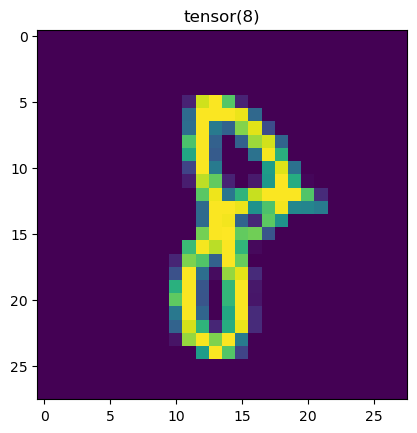

Label: 8


In [90]:
train_features, train_labels = next(iter(trainLoader))
img = torch.reshape(train_features[0], (28, 28)) 
label = train_labels[0]
plt.imshow(img)
plt.title(str(label))
plt.show()
print(f"Label: {label}")

In [104]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Conv2d(kernel_size=3, stride=1, padding=0, in_channels=1, out_channels=16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            # nn.Conv2d(kernel_size=5, stride=1, padding=0, in_channels=16, out_channels=32),
            # nn.ReLU(),
            # nn.MaxPool2d(kernel_size=2, stride=2),
            # nn.Flatten(),
            nn.Linear(32*4*4, 10),
        )

    def forward(self, x):
        print(111)
        x = self.flatten(x)
        print(x.size())
        logits = self.linear_relu_stack(x)
        return logits

In [105]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [102]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [106]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(trainDataset, model, loss_fn, optimizer)
    # test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------


IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)